In [77]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [78]:
df = pd.read_csv("../data/Results.csv")

In [79]:
df.Fastest = df.Fastest.map(dict(Yes=1, No=0))
df.Cheapest = df.Cheapest.map(dict(Yes=1, No=0))
df.Comfortable = df.Comfortable.map(dict(Yes=1, No=0))
df.OnlyOption = df.OnlyOption.map(dict(Yes=1, No=0))
df.Environmental = df.Environmental.map(dict(Yes=1, No=0))
df.Healthiest = df.Healthiest.map(dict(Yes=1, No=0))
df.OtherTrips = df.OtherTrips.map(dict(Yes=1, No=0))

In [80]:
df = df.replace(np.nan, "")

In [81]:
df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")

C:\Users\joanv\AppData\Local\Temp\ipykernel_13392\2345579929.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")


In [82]:
df[df["Center"] == "Barcelona School of Informatics (FIB)"]["GoStage1"].unique()

array([], dtype=object)

In [83]:
pt = df.pivot_table(index="Center", columns="GoStage1", aggfunc="count", fill_value=0)["Answer"]
pt

GoStage1     Bicycle  Bus  \
Center                      
EEABB     5        3    6   
EEBE      6       12   19   
EETAC     3        0   14   
EPSEB     8        1   11   
EPSEM     5        0    4   
EPSEVG    6        1    4   
ESEIAAT   7        2   11   
ETSAB     6        6   11   
ETSAV     2        1    3   
ETSECCPB  6        5   10   
ETSEIB    7        9   18   
ETSETB    2        3   14   
FIB       6        7   30   
FME       0        1    6   
FNB       2        4    2   
FOOT      2        0    2   

GoStage1  Combustion or electric motorcycle with non-renewable source charging  \
Center                                                                           
EEABB                                                     3                      
EEBE                                                     13                      
EETAC                                                     2                      
EPSEB                                                     4                      
EPSEM                                                     3                      
EPSEVG                                                    3                      
ESEIAAT                                                   7                      
ETSAB                                                     7                      
ETSAV                                                     4                      
ETSECCPB                                                  7                      
ETSEIB                                                   22                      
ETSETB                                                    2                      
FIB                                                      10                      
FME                                                       1                      
FNB                                                       5                      
FOOT                                                      1                      

GoStage1  Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),  \
Center                                                                                                              
EEABB                                                     9                                                         
EEBE                                                     12                                                         
EETAC                                                     9                                                         
EPSEB                                                     4                                                         
EPSEM                                                    22                                                         
EPSEVG                                                    6                                                         
ESEIAAT                                                  46                                                         
ETSAB                                                     5                                                         
ETSAV                                                    11                                                         
ETSECCPB                                                  3                                                         
ETSEIB                                                   10                                                         
ETSETB                                                    4                                                         
FIB                                                      15                                                         
FME                                                       0                                                         
FNB                                                       0                                                         
FOOT       

In [84]:
df

Unnamed: 0  Answer Gender    Center    Year  Days ZipCode  \
0              0      11    Man   ESEIAAT   Third     5  8302.0   
1              1      12  Woman     ETSAB   First     3  8290.0   
2              2      16    Man    ETSEIB   First     5  8397.0   
3              3      31    Man     EPSEM  Second     4  8243.0   
4              4      36  Woman     ETSAB  Fourth     2  8401.0   
...          ...     ...    ...       ...     ...   ...     ...   
1443        1443    2963  NR/DK       FIB  Fourth     3  8041.0   
1444        1444    2964  Woman     EPSEB  Fourth     4  8912.0   
1445        1445    2965  Woman       FME   First     5  8023.0   
1446        1446    2966  Woman      FOOT   Third     5  8015.0   
1447        1447    2968  Woman  ETSECCPB   First     5  8940.0   

                                               GoStage1  \
0                                                   Bus   
1     Combustion vehicle (non-plug-in hybrid, electr...   
2     Combustion or electric motorcycle with non-ren...   
3                                               On foot   
4                                                 Renfe   
...                                                 ...   
1443                                        Underground   
1444                                        Underground   
1445                                        Underground   
1446                                        Underground   
1447                                            On foot   

                                               GoStage2  \
0                                                   FGC   
1     Combustion vehicle (non-plug-in hybrid, electr...   
2                                                 Renfe   
3                                               On foot   
4                                           Underground   
...                                                 ...   
1443                                        Underground   
1444                                              Renfe   
1445                                                      
1446                                              Renfe   
1447                                                Bus   

                                               GoStage3  ... BackStage2  \
0                                               On foot  ...              
1     Combustion vehicle (non-plug-in hybrid, electr...  ...              
2                                           Underground  ...              
3                                               On foot  ...              
4                                                        ...              
...                                                 ...  ...        ...   
1443                                                     ...              
1444  Combustion vehicle (non-plug-in hybrid, electr...  ...              
1445                                                     ...              
1446                                            On foot  ...              
1447                                            On foot  ...       Tram   

     BackStage3 Fastest Cheapest  Comfortable  OnlyOption  Environmental  \
0                     0        0            0           1              0   
1                     0        0            0           0              0   
2                     0        1            0           0              1   
3                     1        0            0           0              1   
4                     0        0            0           1              0   
...         ...     ...      ...          ...         ...            ...   
1443                  1        1            0           0              0   
1444                  0        0            0           0              0   
1445                  1        0            1           0              0   
1446                  1        1            0           0              0   
1447    On foot       0        1            0 

In [85]:
changes = {
    "FGC" : 2 ,
    "On foot" : 14 ,
    "Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging)," : 11 ,
    "Underground" : 7 ,
    "Bus" : 3 ,
    "Combustion or electric motorcycle with non-renewable source charging" : 11 ,
    "Renfe" : 1 ,
    "Tram" : 8 ,
    "Bicycle" : 13 ,
    "Taxi" : 10 ,
    "Electric motorcycle" : 11 ,
    "Scooter (or other micro-mobility devices) with renewable charging" : 12 ,
    "Scooter (or other micro-mobility devices) with non-renewable charging" : 12 ,
    "Electric vehicle (with Zero label and renewable source charging)" : 11 ,
    "" : 100 ,
}

In [86]:
df[["GoStage1","GoStage2","GoStage3"] ] = df[["GoStage1","GoStage2","GoStage3"] ].replace(changes)

In [87]:
df["GoStagec"] = df[["GoStage1","GoStage2","GoStage3"] ].min( axis = 1)

In [88]:
changes_back = {
    2 : "FGC" ,
    1 : "Tren",
    3 : "Bus",
    8 : "Tram",
    7 : "Underground",
    10 : "Taxi",
    11 : "Vehicle",
    12 : "Scooter",
    13 : "Bicycle",
    14 : "On foot",
    100 : "" 
}

In [89]:
changes_back2 = {
    2 : "Público" ,
    1 : "Público",
    3 : "Público",
    8 : "Público",
    7 : "Público",
    10 : "Privado",
    11 : "Privado",
    12 : "Privado",
    13 : "Activa",
    14 : "Activa",
    100 : "" 
}

In [90]:
df["GoStage"] = df["GoStagec"].replace( changes_back2)
df["GoStagec"] = df["GoStagec"].replace( changes_back)

In [91]:
df = df.drop( ["GoStage1","GoStage2","GoStage3" ] , axis = 1 )

In [92]:
changes_center = {
    "FIB" : "Nord",
    "ETSETB" : "Nord",
    "ETSECCPB" : "Nord",
    "ETSEIB" : "Sud",
    "ETSAB" : "Sud",
    "ETSAV" : "Cugat",
    "FME" : "Sud",
    "EPSEB" : "Sud",
    "EPSEVG" : "Villanova",
    "FNB" : "Nàutica",
    "EEBE" : "Besòs",
    "EETAC" : "Castelldefels",
    "EEABB" : "Castelldefels",
    "ESEIAAT" : "Terrassa",
    "FOOT" : "Terrassa",
    "EPSEM" : "Manresa"
}

In [93]:
df["Center"] = df["Center"].replace( changes_center)

In [94]:
df

Unnamed: 0  Answer Gender    Center    Year  Days ZipCode SameBack  \
0              0      11    Man  Terrassa   Third     5  8302.0       No   
1              1      12  Woman       Sud   First     3  8290.0      Yes   
2              2      16    Man       Sud   First     5  8397.0      Yes   
3              3      31    Man   Manresa  Second     4  8243.0      Yes   
4              4      36  Woman       Sud  Fourth     2  8401.0      Yes   
...          ...     ...    ...       ...     ...   ...     ...      ...   
1443        1443    2963  NR/DK      Nord  Fourth     3  8041.0      Yes   
1444        1444    2964  Woman       Sud  Fourth     4  8912.0      Yes   
1445        1445    2965  Woman       Sud   First     5  8023.0      Yes   
1446        1446    2966  Woman  Terrassa   Third     5  8015.0      Yes   
1447        1447    2968  Woman      Nord   First     5  8940.0       No   

                                             BackStage1 BackStage2  ...  \
0     Combustion vehicle (non-plug-in hybrid, electr...             ...   
1                                                                   ...   
2                                                                   ...   
3                                                                   ...   
4                                                                   ...   
...                                                 ...        ...  ...   
1443                                                                ...   
1444                                                                ...   
1445                                                                ...   
1446                                                                ...   
1447                                            On foot       Tram  ...   

     Fastest  Cheapest  Comfortable  OnlyOption  Environmental  Healthiest  \
0          0         0            0           1              0           0   
1          0         0            0           0              0           0   
2          0         1            0           0              1           0   
3          1         0            0           0              1           0   
4          0         0            0           1              0           0   
...      ...       ...          ...         ...            ...         ...   
1443       1         1            0           0              0           0   
1444       0         0            0           0              0           0   
1445       1         0            1           0              0           0   
1446       1         1            0           0              0           0   
1447       0         1            0           0              0           0   

      OtherTrips                                              Other  \
0              0                                                      
1              1                                                      
2              0                                                      
3              0                                                      
4              0                                                      
...          ...                                                ...   
1443           0                                                      
1444           0  Because I can't enter Barcelona with my car be...   
1445           0                                                      
1446           0                                                      
1447           0                                     I don't drive.   

         GoStagec  GoStage  
0             FGC  Público  
1         Vehicle  Privado  
2            Tren  Público  
3         On foot   Activa  
4            Tren  Público  
...           ...      ...  
1443  Underground  Público  
1444         Tren  Público  
1445  Underground  Público  
1446         Tren  Público  
1447          Bus  Público  

[1448 rows x 21 columns]

In [97]:
Centers = ["Nord","Sud","Nàutica","Besòs","Castelldefels","Terrassa","Manresa","Cugat","Villanova"]; Centers
ZipCodes = df["ZipCode"].unique();
GoStages = ["Activa","Público","Privado"]
GoStagesc = df["GoStagec"].unique();

In [98]:
def pie_plot( percentages , lab ):
    plt.pyplot.pie( percentages ,  labels = lab , shadow = False , autopct=lambda p:f'{p*sum(percentages)/100 :.0f}' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
    centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
    fig = plt.pyplot.gcf()
    fig.gca().add_artist(centre_circle)
    plt.pyplot.show()

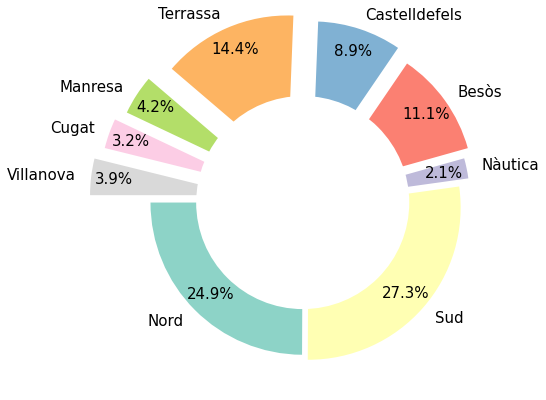

In [233]:
percentages = []
for center in Centers :
    percentages.append( sum(df["Center"]==center))
    
plt.pyplot.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
plt.pyplot.pie( percentages ,  labels = Centers , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=180 ,
              explode = 0.05 * np.arange(len(percentages)) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

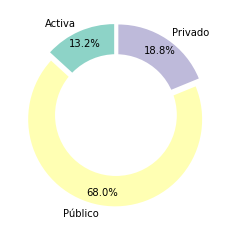

In [100]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

8302.0


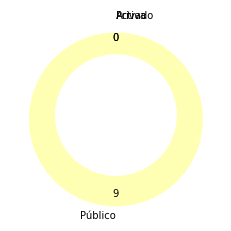

8290.0


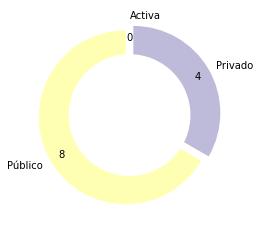

8397.0


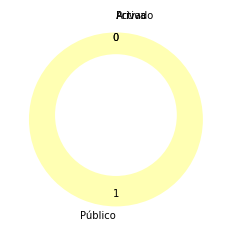

8243.0


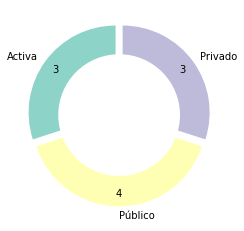

8401.0


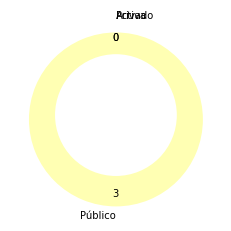

8002.0


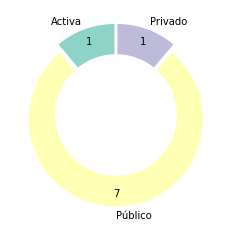

8241.0


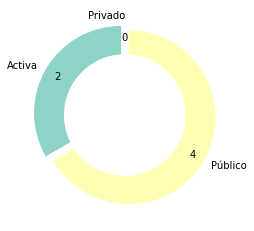

8024.0


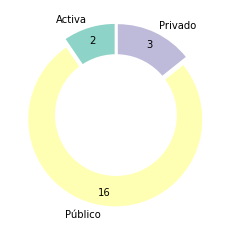

8227.0


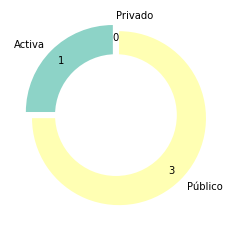

8197.0


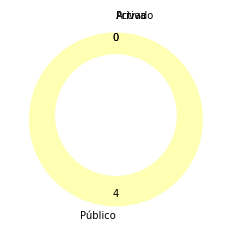

8014.0


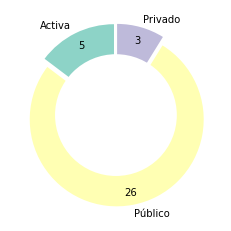

8720.0


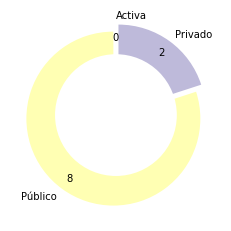

8031.0


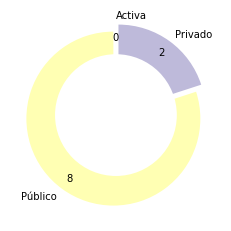

8029.0


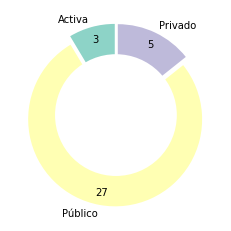

8902.0


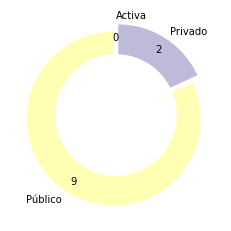

8027.0


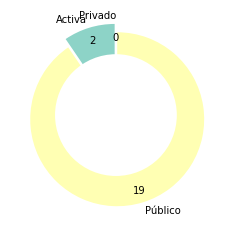

8186.0


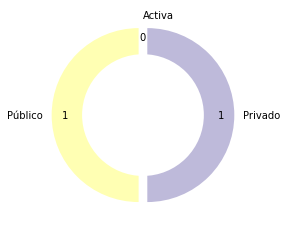

8018.0


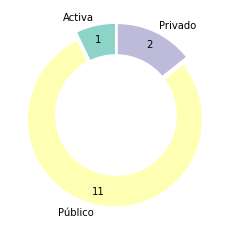

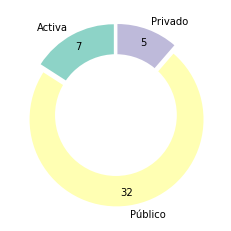

8950.0


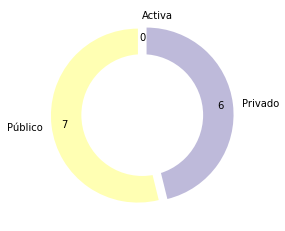

8030.0


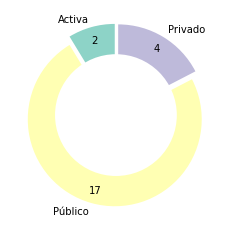

8903.0


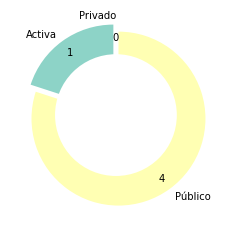

8211.0


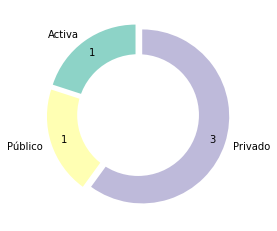

8028.0


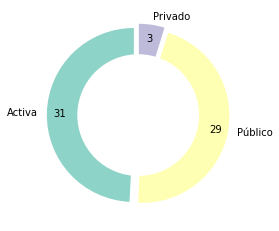

8500.0


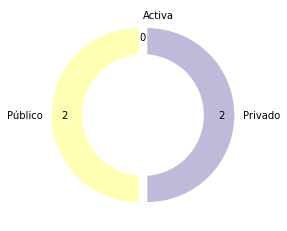

8003.0


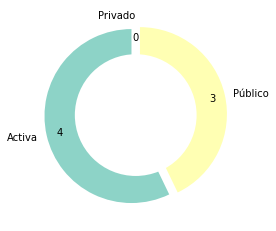

8020.0


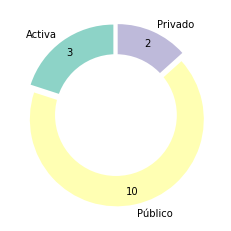

8830.0


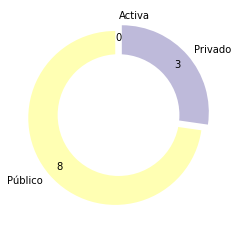

8330.0


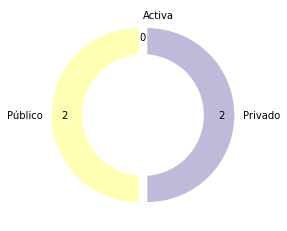

8960.0


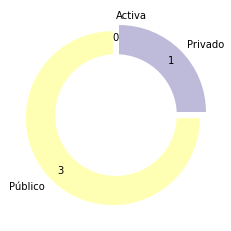

8022.0


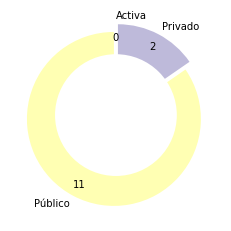

8205.0


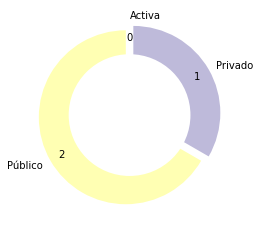

8338.0


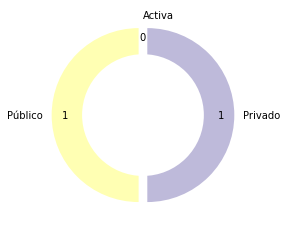

9850.0


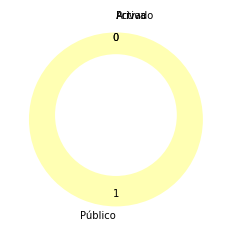

8921.0


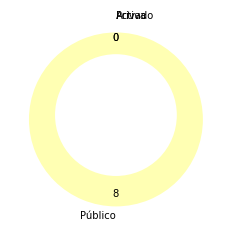

8172.0


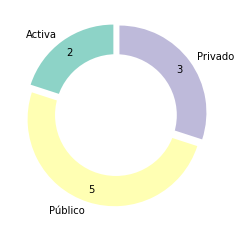

8221.0


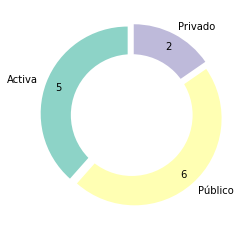

8011.0


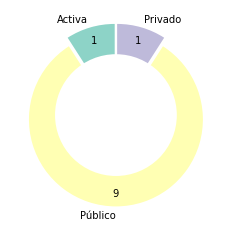

8222.0


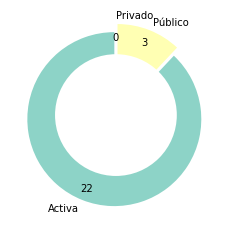

8340.0


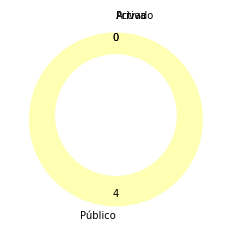

8202.0


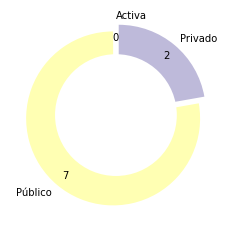

8015.0


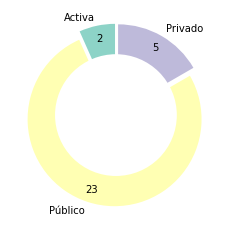

8009.0


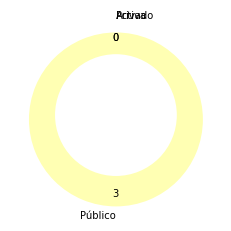

8013.0


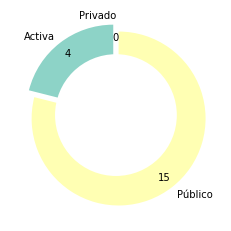

8750.0


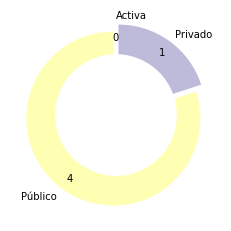

8021.0


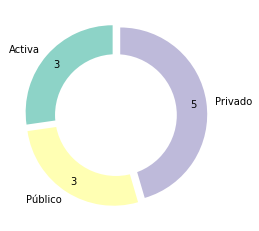

8004.0


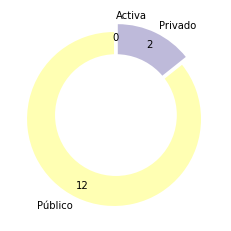

8901.0


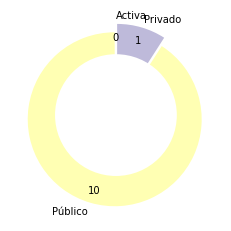

8391.0


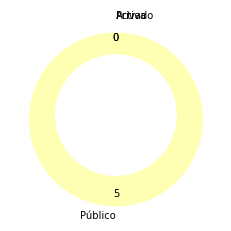

8100.0


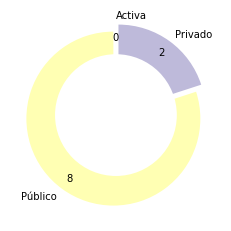

8849.0


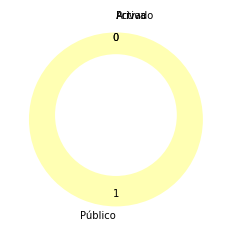

8850.0


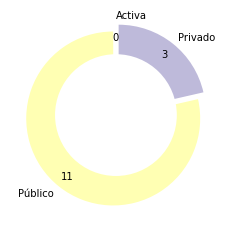

8800.0


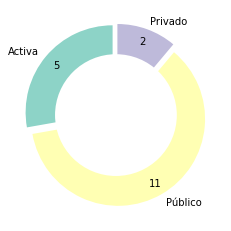

8036.0


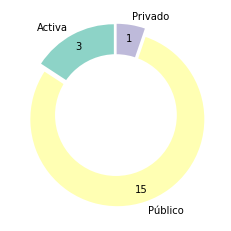

8140.0


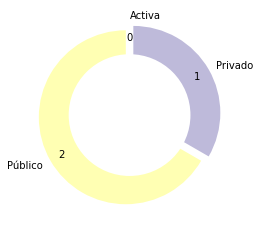

8032.0


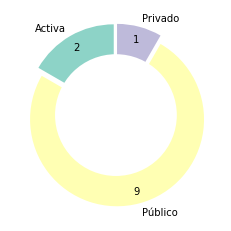

8184.0


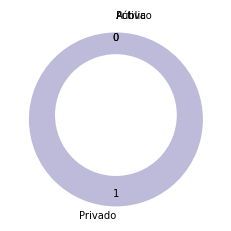

8034.0


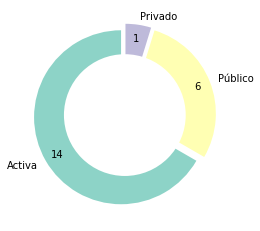

8860.0


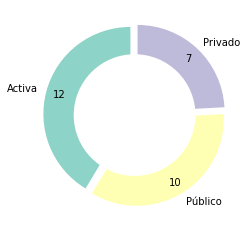

8019.0


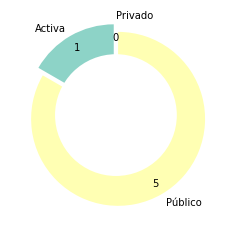

8008.0


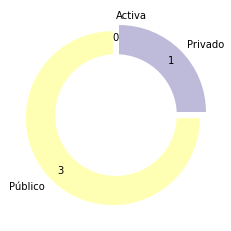

8192.0


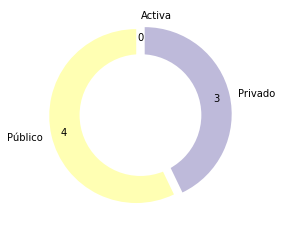

8012.0


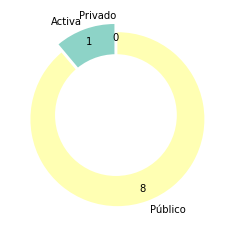

8912.0


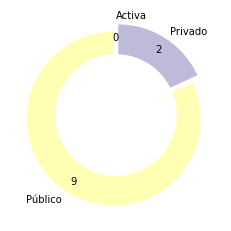

8840.0


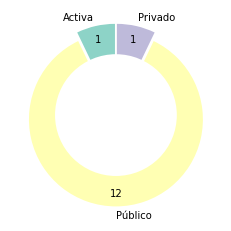

8242.0


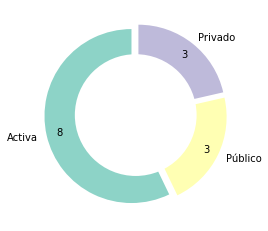

8150.0


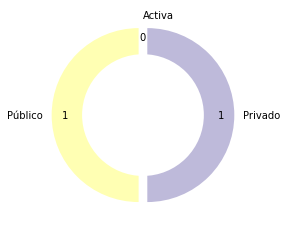

8170.0


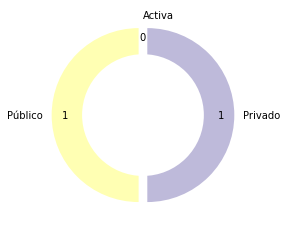

8042.0


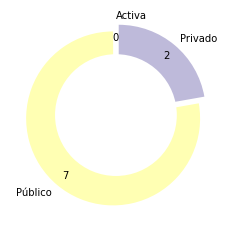

8979.0


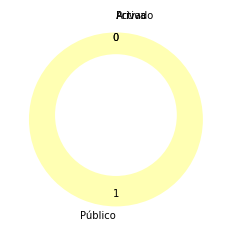

8026.0


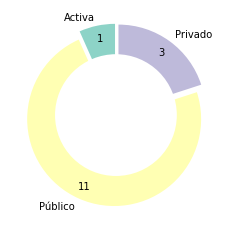

8930.0


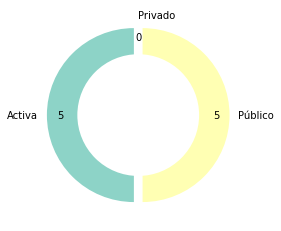

8206.0


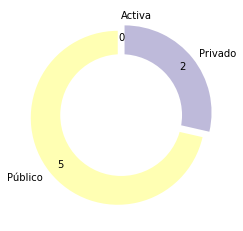

8440.0


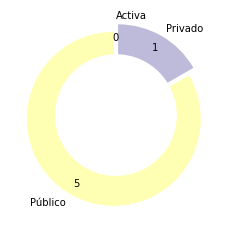

8870.0


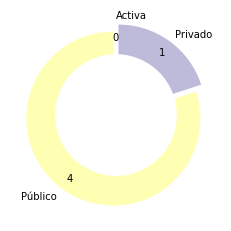

8225.0


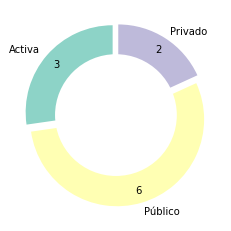

8904.0


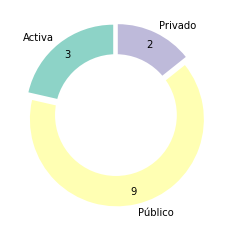

8016.0


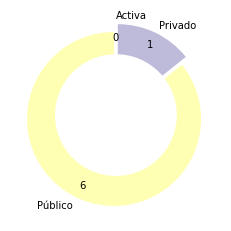

8339.0


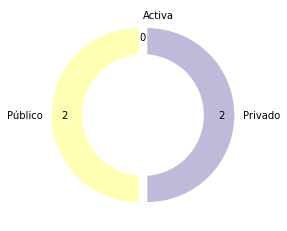

8006.0


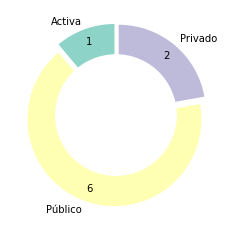

8228.0


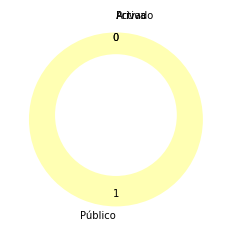

8201.0


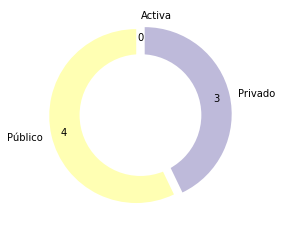

8035.0


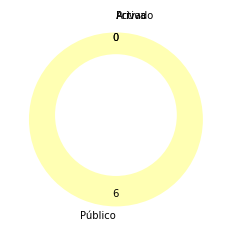

8174.0


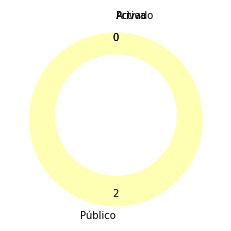

8757.0


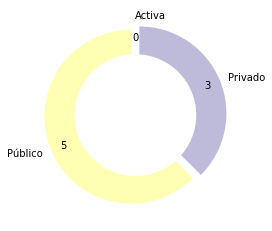

8940.0


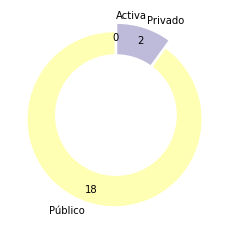

8980.0


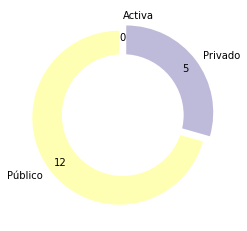

8005.0


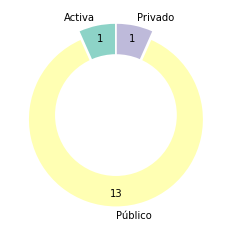

8292.0


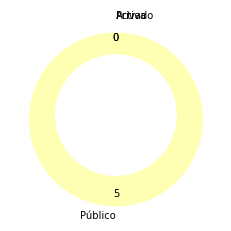

8025.0


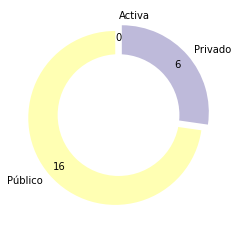

8970.0


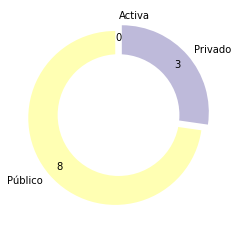

8508.0


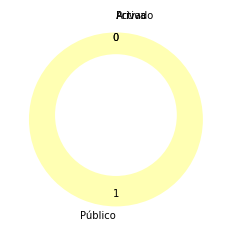

8560.0


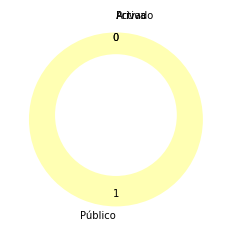

8370.0


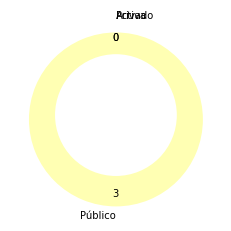

8033.0


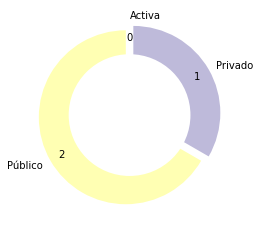

8711.0


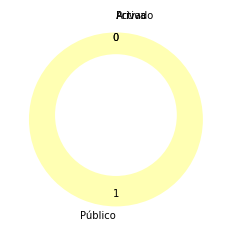

8402.0


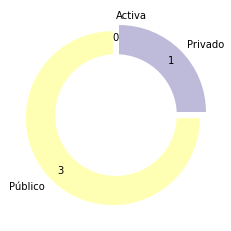

8328.0


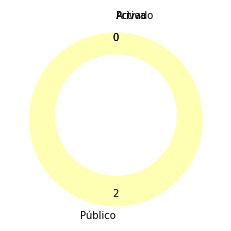

8480.0


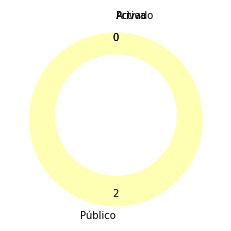

8023.0


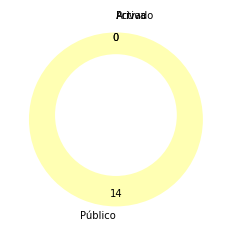

8037.0


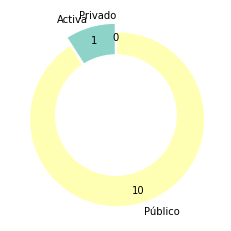

17005.0


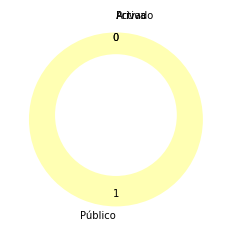

8303.0


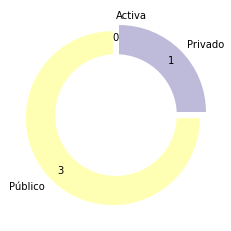

8905.0


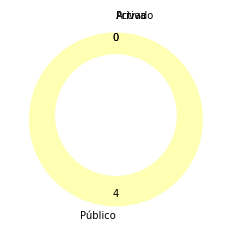

8310.0


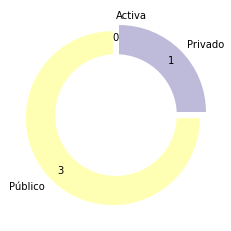

8182.0


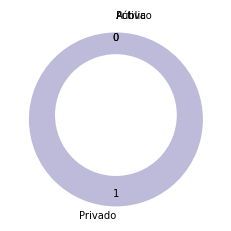

8120.0


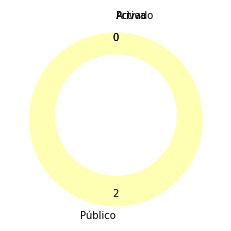

8223.0


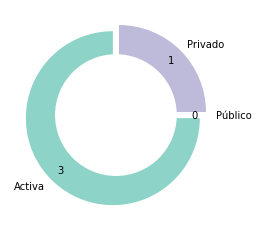

8739.0


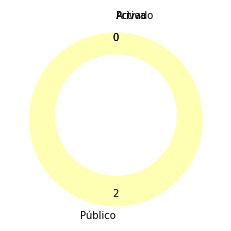

8110.0


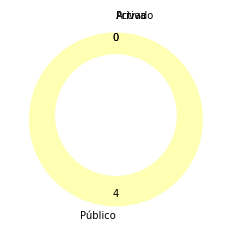

8180.0


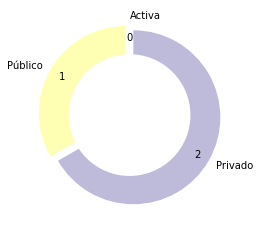

8233.0


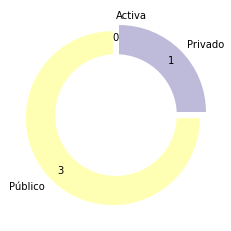

8820.0


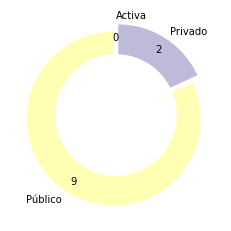

8224.0


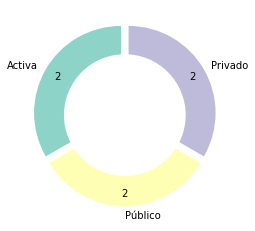

8790.0


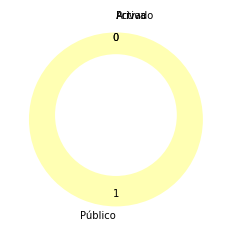

8924.0


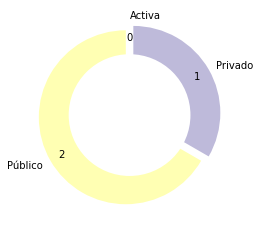

8914.0


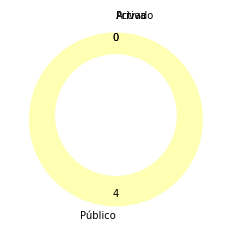

8007.0


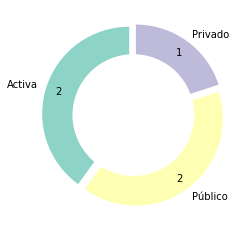

8781.0


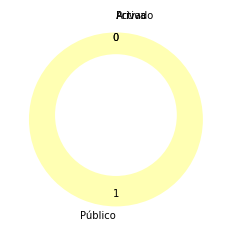

8010.0


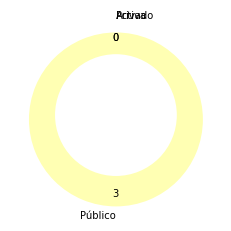

8198.0


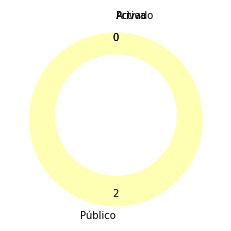

8173.0


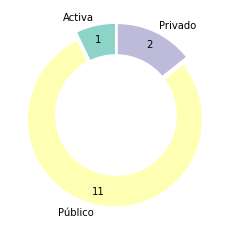

8208.0


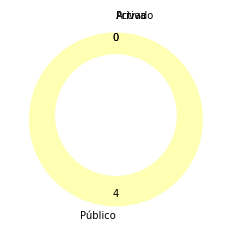

8760.0


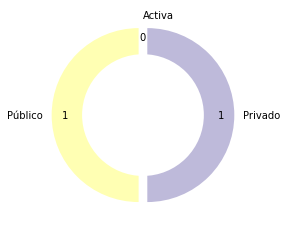

8700.0


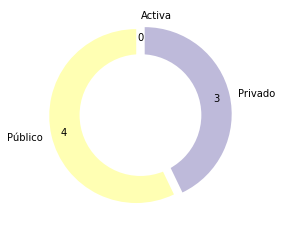

8784.0


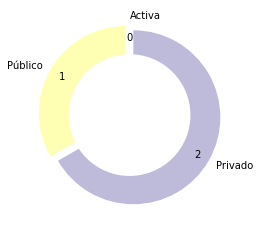

8740.0


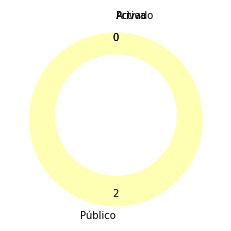

8733.0


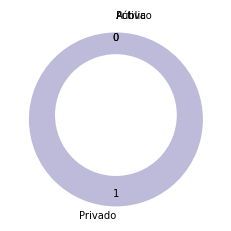

17401.0


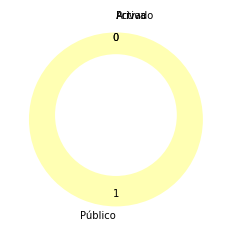

8041.0


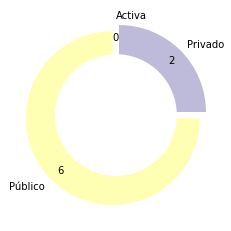

8017.0


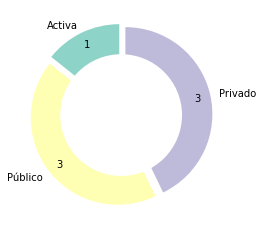

25560.0


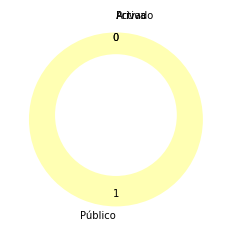

8810.0


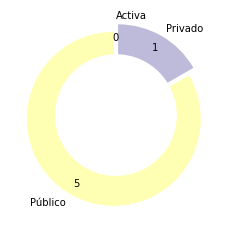

8692.0


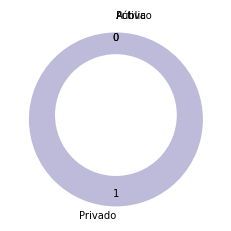

8210.0


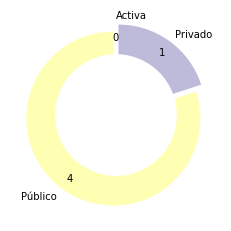

4545.0


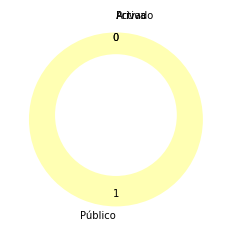

8207.0


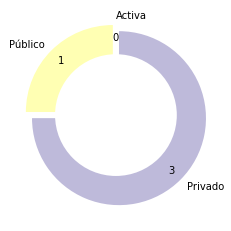

80233.0


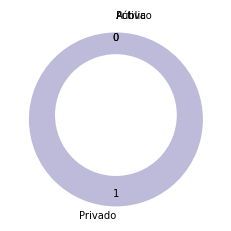

8191.0


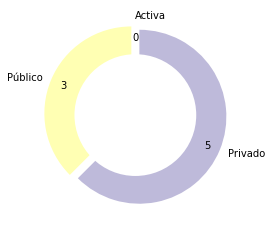

8458.0


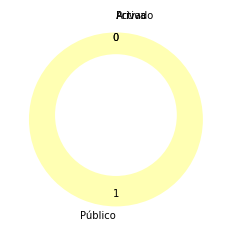

8922.0


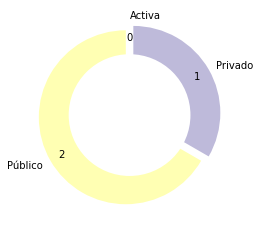

8585.0


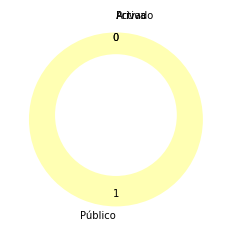

8273.0


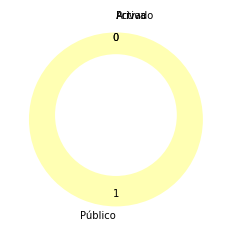

8450.0


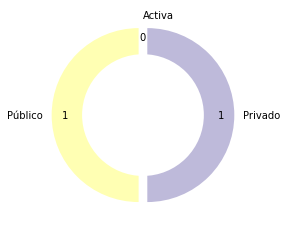

8232.0


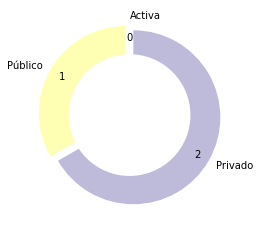

17004.0


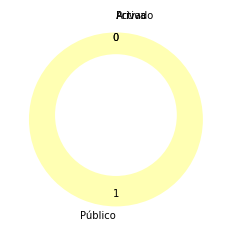

8392.0


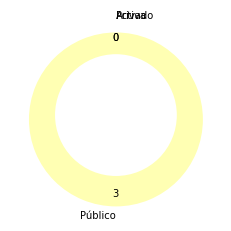

8459.0


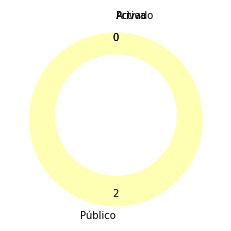

8758.0


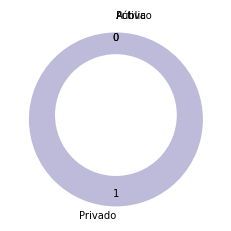

8271.0


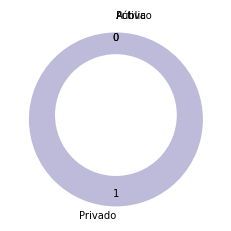

8600.0


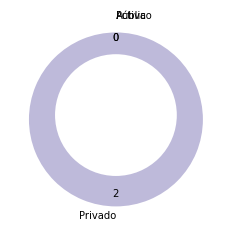

0.0


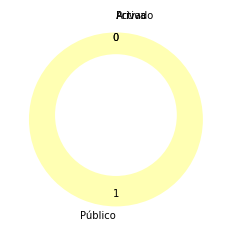

8185.0


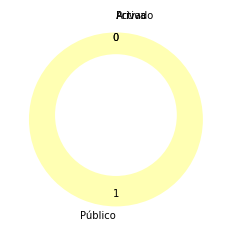

8001.0


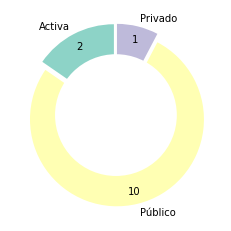

27600.0


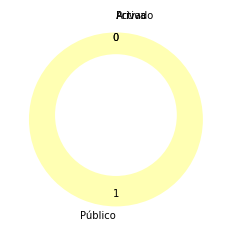

8430.0


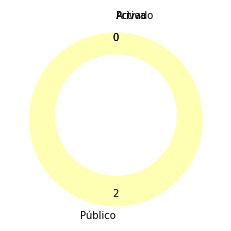

43881.0


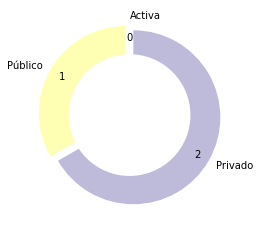

8918.0


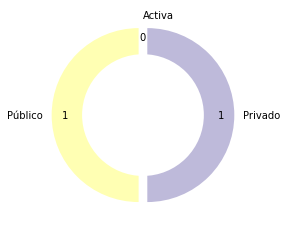

8291.0


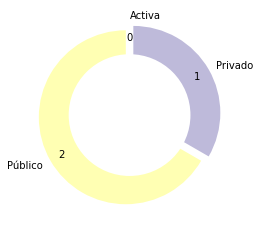

8650.0


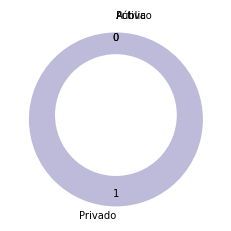

8203.0


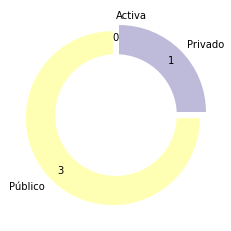

8620.0


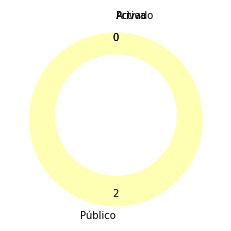

43700.0


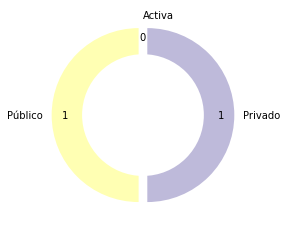

17007.0


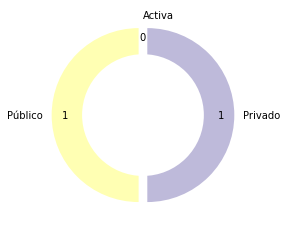

43882.0


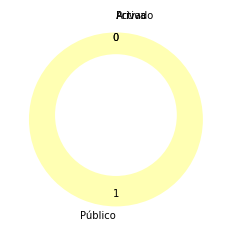

8204.0


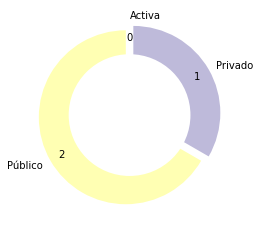

8630.0


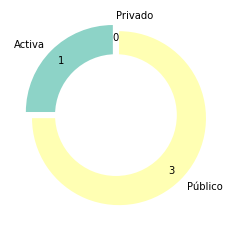

8571.0


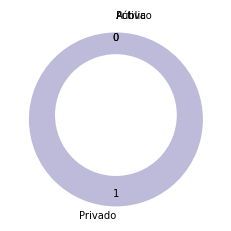

8270.0


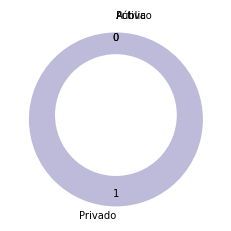

80826.0


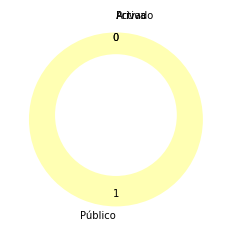

8304.0


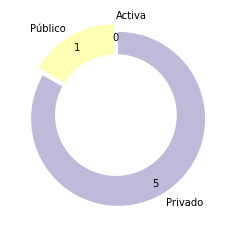

8788.0


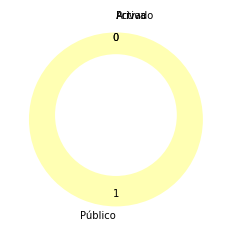

8253.0


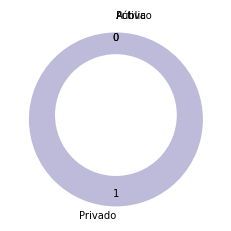

8410.0


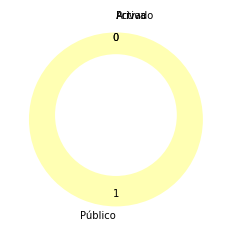

8786.0


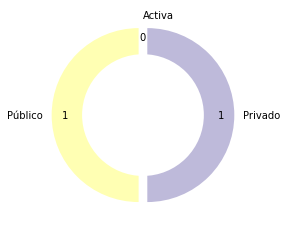

8917.0


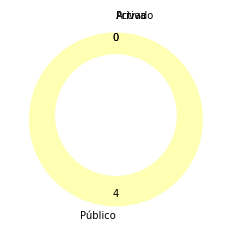

25430.0


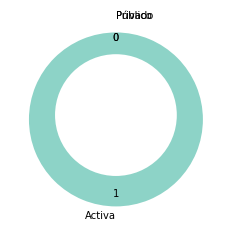

43203.0


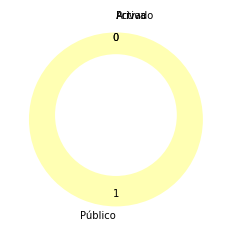

8226.0


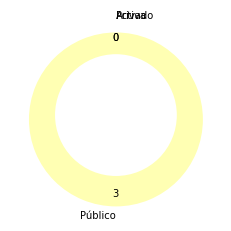

43830.0


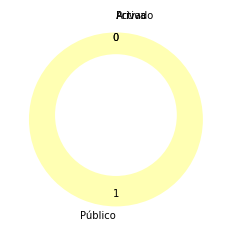

8320.0


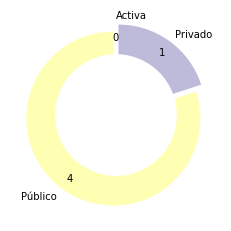

8640.0


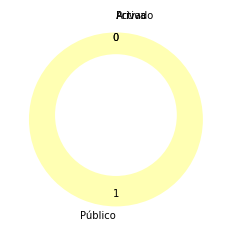

43580.0


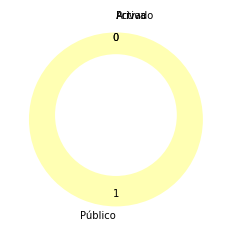

7712.0


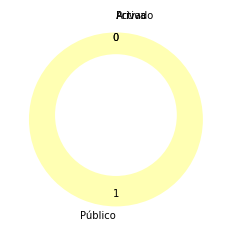

45003.0


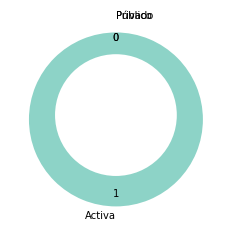

17300.0


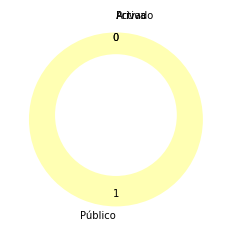

8756.0


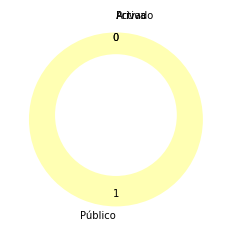

8911.0


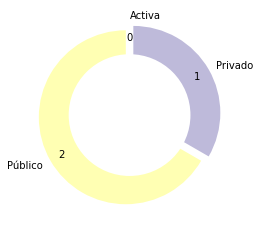

8470.0


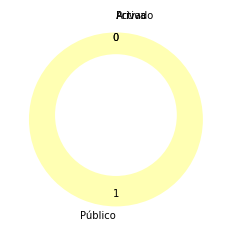

8107.0


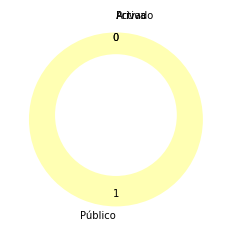

8415.0


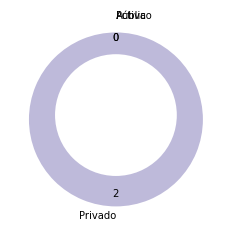

8570.0


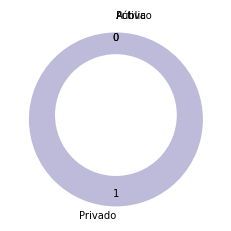

8461.0


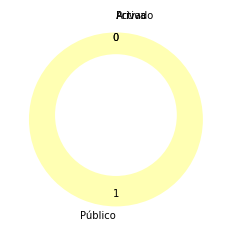

8390.0


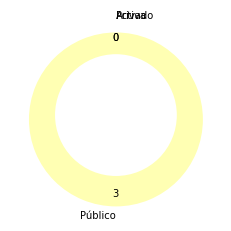

8280.0


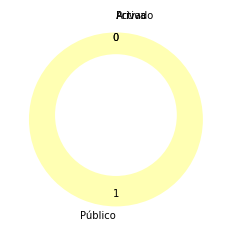

8798.0


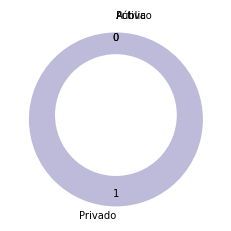

8250.0


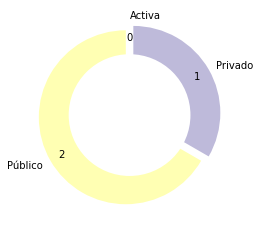

8350.0


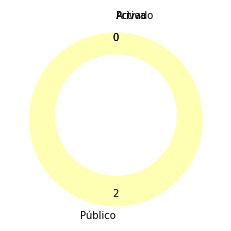

8348.0


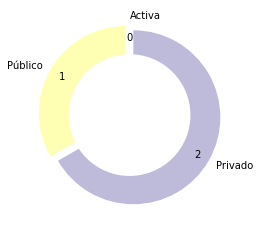

8251.0


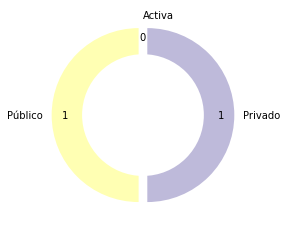

8906.0


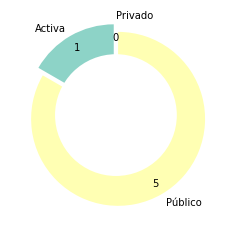

8187.0


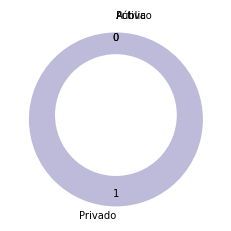

8301.0


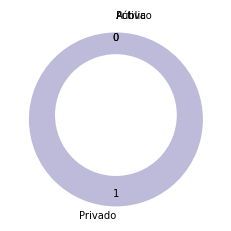

8755.0


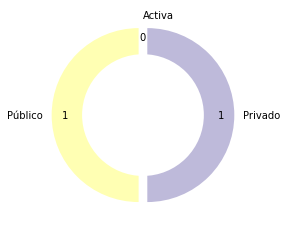

8380.0


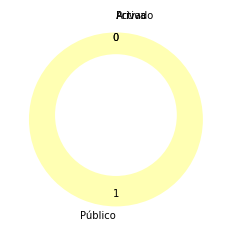

8214.0


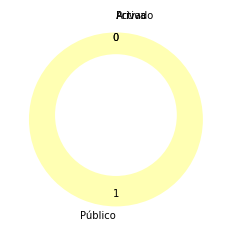

17411.0


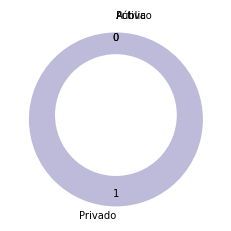

8038.0


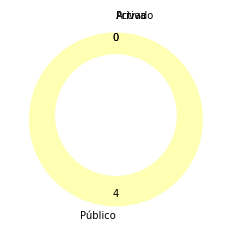

8869.0


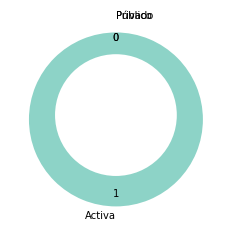

8295.0


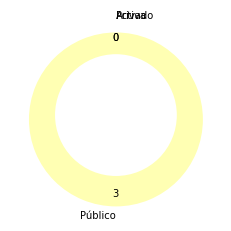

8105.0


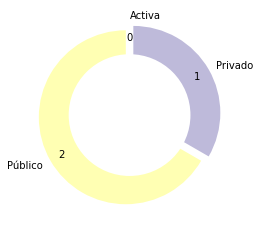

17240.0


C:\Users\joanv\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3052: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [101]:
for code in ZipCodes:
    print(code)
    percentages = []
    for stage in GoStages :
        percentages.append( sum(df[df["ZipCode"] == code]["GoStage"]==stage))
    pie_plot(percentages,GoStages)

Nord


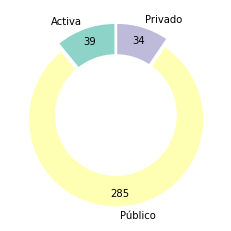

Sud


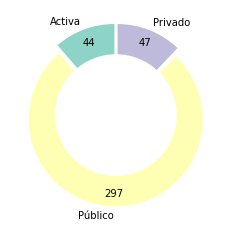

Nàutica


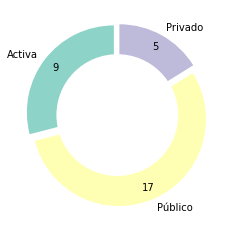

Besòs


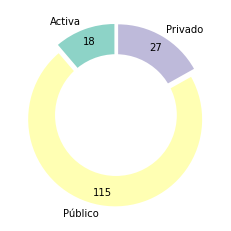

Castelldefels


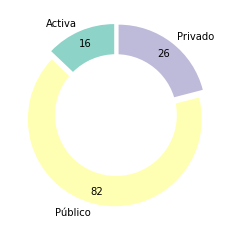

Terrassa


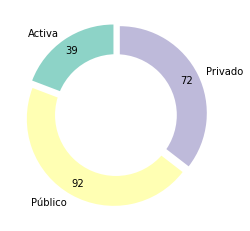

Manresa


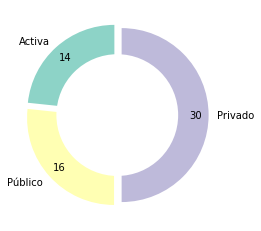

Cugat


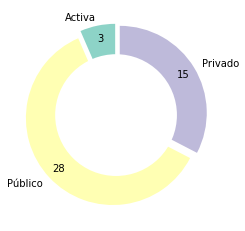

Villanova


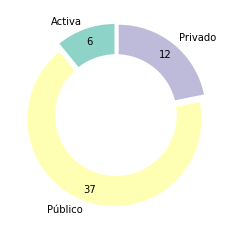

In [102]:
for center in Centers:
    print(center)
    percentages = []
    for stage in GoStages :
        percentages.append( sum(df[df["Center"] == center]["GoStage"]==stage))
    pie_plot(percentages,GoStages)


In [103]:
from geopandas import GeoDataFrame
import pandas as pd
from shapely.geometry import LineString
import typing as T
from itertools import zip_longest
import os
import folium
import numpy as np

In [104]:
dist = pd.read_csv('../data/Enrollment.csv')

In [105]:
municipalities = pd.read_csv("../data/codigos_postales_municipios.csv", dtype="string")
#municipalities.head()

In [106]:
import geopandas as gpd

path = "../data/codigos_postales.shp"
spain = gpd.read_file(path)
municipalities.codigo_postal = municipalities['codigo_postal'].str.zfill(5)
spain = pd.merge(spain, municipalities[['codigo_postal', 'municipio_nombre']], how='inner', left_on=['COD_POSTAL'], right_on=['codigo_postal'])
#spain.head()

In [263]:
def plot_municipality_heat_map(municipality_weights):
    municipality_weights = municipality_weights.copy()
    municipality_weights['zip_code'] = municipality_weights['zip_code'].dropna().astype(int).astype(str).str.zfill(5)
    spain_displayed = pd.merge(spain, municipality_weights, how='inner', left_on=['COD_POSTAL'], right_on=['zip_code'])
    # print(spain_displayed.head())
    
    spain_displayed['name'] = (spain_displayed['COD_POSTAL'] + " " + spain_displayed['municipio_nombre'])
    
    tooltip = folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["Municipality"],
        localize=True,
        sticky=False,
        labels=True,
        style="""
            background-color: #F0EFEF;
            border: 1px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
        max_width=800,
    )
    style = lambda x: {'fillColor':'#599191', "weight": 1, "color": "black", 'fillOpacity': x['properties']['weight'] }
    
    folium.GeoJson(spain_displayed,style_function=style, tooltip = tooltip).add_to(municipality_map)
    return municipality_map

In [108]:
students_per_municipality =pd.DataFrame({'codigo_postal': df["ZipCode"].replace({"":0}).astype("int64")})
students_per_municipality.value_counts('codigo_postal')

codigo_postal
8028     63
0        49
8029     37
8014     34
8015     30
         ..
8470      1
8461      1
8460      1
8458      1
83293     1
Length: 271, dtype: int64

# Mapa global

In [264]:
municipality_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')

weights1=pd.DataFrame({"zip_code": df['ZipCode'], "weight": [1]*len(df['ZipCode'])})
weights1 = weights1.groupby('zip_code').sum()
weights1['weight'] = np.log(weights1['weight']) / np.log(weights1['weight'].max())
weights1 = weights1.reset_index()
weights1 = weights1.drop(len(weights1)-1 )

In [265]:
plot_municipality_heat_map(weights1)

In [112]:
municipality_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')

weights_nord=pd.DataFrame({"zip_code": df_local['ZipCode'], "weight": [1]*len(df_local['ZipCode'])})
weights_nord = weights_nord.groupby('zip_code').sum()
weights_nord['weight'] = np.log(weights_nord['weight']) / np.log(weights_nord['weight'].max())
weights_nord = weights_nord.reset_index()
weights_nord = weights_nord.drop(len(weights_nord)-1 )

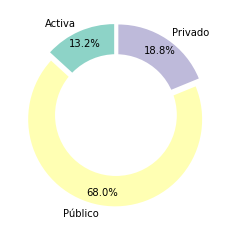

In [188]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

# Nord and Sud

In [266]:
df_local = df[ df["Center"].isin(["Nord","Sud"]) ]

In [267]:
municipality_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')

weights_sud=pd.DataFrame({"zip_code": df_local['ZipCode'], "weight": [1]*len(df_local['ZipCode'])})
weights_sud = weights_sud.groupby('zip_code').sum()
weights_sud['weight'] = np.log(weights_sud['weight']) / np.log(weights_sud['weight'].max())
weights_sud = weights_sud.reset_index()
weights_sud = weights_sud.drop(len(weights_sud)-1)

In [268]:
m = plot_municipality_heat_map(weights_sud)
folium.Marker(location=[41.38590531398507,2.1156621824795994],popup="Nord").add_to(m)
m

Mucha gente por las zonas de gracia y marina

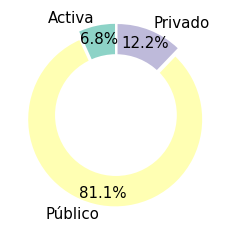

In [255]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df_local[df_local["ZipCode"].isin([8025,8024,8013,8018,8005,8026,8003]) ]["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

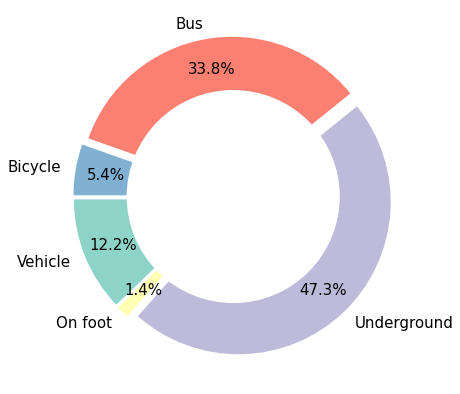

In [259]:
percentages = []
s = []
for stage in GoStagesc :
    if( sum(df_local[df_local["ZipCode"].isin([8025,8024,8013,8018,8005,8026,8003]) ]["GoStagec"]==stage) != 0):
        percentages.append( sum(df_local[df_local["ZipCode"].isin([8025,8024,8013,8018,8005,8026,8003]) ]["GoStagec"]==stage))
        s.append( stage )

plt.pyplot.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
plt.pyplot.pie( percentages ,  labels = s , shadow = False , autopct='%1.1f%%' , pctdistance=0.8 , startangle=180 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

In [207]:




pd.set_option('display.max_columns', None ,'display.max_rows', None )
df_local[df_local["ZipCode"].isin([8025,8024,8013,8018,8005,8026,8003])]

Unnamed: 0  Answer Gender Center    Year  Days ZipCode SameBack  \
17            17      70    Man    Sud   Third     4  8018.0      Yes   
26            26     102    Man    Sud  Second     1  8003.0      Yes   
115          115     316    Man    Sud  Second     5  8013.0      Yes   
131          131     341    Man    Sud   First     5  8003.0      Yes   
139          139     354  Woman    Sud  Second     4  8013.0      Yes   
149          149     378  Woman   Nord  Second     5  8005.0      Yes   
166          166     412  Woman    Sud   Third     5  8018.0       No   
181          181     445    Man   Nord   First     5  8018.0      Yes   
192          192     465    Man   Nord   First     4  8005.0      Yes   
198          198     474  Woman    Sud   First     5  8005.0      Yes   
222          222     543  Woman    Sud  Second     5  8024.0      Yes   
284          284     673    Man    Sud  Fourth     5  8026.0      Yes   
298          298     696  Woman    Sud   First     5  8026.0      Yes   
330          330     767  Woman    Sud  Second     5  8025.0      Yes   
333          333     770  Woman   Nord   First     5  8005.0      Yes   
373          373     855    Man    Sud   Third     4  8024.0      Yes   
402          402     920  Woman    Sud  Second     3  8005.0      Yes   
418          418     959    Man    Sud   First     5  8024.0       No   
448          448    1006    Man    Sud  Fourth     5  8024.0      Yes   
451          451    1012    Man   Nord   Third     5  8026.0      Yes   
453          453    1014  Woman    Sud  Second     3  8018.0      Yes   
454          454    1015    Man    Sud  Fourth     5  8025.0       No   
505          505    1107    Man   Nord  Fourth     5  8024.0      Yes   
514          514    1129    Man    Sud  Second     3  8026.0       No   
535          535    1167    Man   Nord  Fourth     4  8024.0       No   
543          543    1186  Woman    Sud   First     3  8025.0      Yes   
549          549    1193  Woman   Nord   Third     5  8025.0      Yes   
624          624    1321    Man   Nord  Second     6  8018.0      Yes   
629          629    1331    Man    Sud   Third     3  8005.0      Yes   
643          643    1354    Man   Nord   First     4  8024.0       No   
644          644    1356    Man    Sud   First     5  8013.0       No   
651          651    1372  Woman    Sud   First     5  8018.0      Yes   
680          680    1418  Woman   Nord   First     5  8013.0      Yes   
690          690    1434    Man   Nord   Third     3  8025.0      Yes   
691          691    1435  Woman    Sud  Second     5  8018.0      Yes   
693          693    1437  Woman    Sud  Second     6  8013.0      Yes   
709          709    1458    Man   Nord   First     5  8018.0      Yes   
716          716    1472  Woman    Sud  Second     3  8025.0       No   
741          741    1540  Woman   Nord   First     5  8025.0      Yes   
756          756    1578  Woman    Sud  Fourth     4  8025.0      Yes   
759          759    1582    Man    Sud   First     5  8018.0      Yes   
793          793    1663    Man    Sud  Second     5  8025.0       No   
812          812    1699    Man   Nord   First     5  8026.0      Yes   
846          846    1767    Man   Nord   First     5  8005.0      Yes   
869          869    1830    Man   Nord   First     4  8013.0      Yes   
878          878    1844    Man   Nord   Third     5  8024.0      Yes   
929          929    1926    Man   Nord  Fourth     1  8024.0      Yes   
946          946    1954  Woman   Nord   First     3  8005.0      Yes   
967          967    1991  Woman   Nord  Second     4  8003.0      Yes   
1015        1015    2077    Man    Sud  Second     4  8024.0      Yes   
1040        1040    2131    Man    Sud  Second     1  8025.0      Yes   
1088        1088    2221    Man   Nord   First     4  8025.0      Yes   
1100        1100    2247  Woman    Sud  Fourth     3  8024.0       No   
1123        1123    2293  Woman    Sud   Third     4  8018.0    

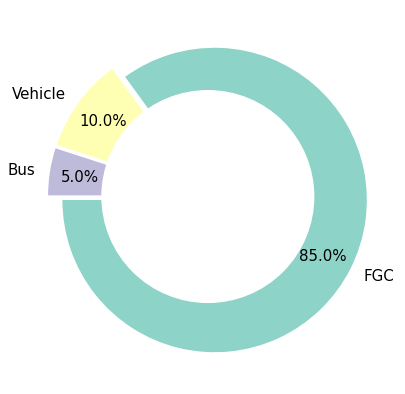

In [272]:
percentages = []
s = []
for stage in GoStagesc :
    if( sum(df_local[df_local["ZipCode"].isin([8173,8221,8224]) ]["GoStagec"]==stage) != 0):
        percentages.append( sum(df_local[df_local["ZipCode"].isin([8173,8221,8224]) ]["GoStagec"]==stage))
        s.append( stage )

plt.pyplot.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
plt.pyplot.pie( percentages ,  labels = s , shadow = False , autopct='%1.1f%%' , pctdistance=0.80 , startangle=180 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()


In [211]:
pd.set_option('display.max_columns', None ,'display.max_rows', None )
df_local[df_local["ZipCode"].isin([8173,8221,8224])]

Unnamed: 0  Answer Gender Center    Year  Days ZipCode SameBack  \
39            39     133  Woman    Sud   First     4  8221.0       No   
53            53     172  Woman   Nord   First     5  8221.0       No   
146          146     375  Woman   Nord   First     3  8221.0      Yes   
285          285     674    Man    Sud   First     5  8173.0       No   
415          415     949    Man   Nord   Third     6  8173.0      Yes   
497          497    1090  Woman    Sud  Fourth     5  8173.0      Yes   
609          609    1301  Woman   Nord  Fourth     5  8173.0      Yes   
636          636    1343    Man   Nord  Second     5  8221.0      Yes   
766          766    1600    Man    Sud  Fourth     1  8173.0      Yes   
879          879    1846    Man   Nord  Second     5  8173.0      Yes   
1146        1146    2347    Man   Nord  Fourth     6  8173.0      Yes   
1160        1160    2384    Man    Sud   Third     5  8173.0      Yes   
1183        1183    2454  Woman   Nord   Third     5  8224.0      Yes   
1209        1209    2500    Man   Nord   First     3  8173.0      Yes   
1284        1284    2666  Woman    Sud  Second     5  8173.0      Yes   
1300        1300    2692    Man    Sud   Third     4  8224.0       No   
1359        1359    2801    Man    Sud   Third     4  8224.0      Yes   
1406        1406    2899    Man   Nord  Second     3  8173.0      Yes   
1413        1413    2913    Man    Sud   Third     5  8221.0       No   
1431        1431    2938  Woman   Nord   First     5  8221.0      Yes   

     BackStage1 BackStage2 BackStage3  Fastest  Cheapest  Comfortable  \
39      On foot      Renfe        FGC        1         0            1   
53          Bus    On foot                   0         0            0   
146                                          1         1            0   
285     On foot        Bus        FGC        0         0            0   
415                                          0         0            1   
497                                          1         0            0   
609                                          0         0            1   
636                                          0         0            1   
766                                          0         0            1   
879                                          1         0            0   
1146                                         0         0            1   
1160                                         1         1            0   
1183                                         1         0            0   
1209                                         1         0            1   
1284                                         0         0            0   
1300        Bus        FGC    On foot        1         0            0   
1359                                         1         0            1   
1406                                         0         1            0   
1413    On foot        FGC    On foot        1         0            1   
1431                                         1         0            0   

      OnlyOption  Environmental  Healthiest  OtherTrips  \
39             0              0           0           0   
53             1              0           0           0   
146            0              0           0           0   
285            0              1           1           0   
415            0              0           0           1   
497            0              0           0           0   
609            0              0           0           0   
636            0              0           0           0   
766            0              1           0           0   
879            0              0           0           0   
1146           1              0           0           0   
1160           0              0           0           0   
1183           1              0           0           0   
1209           0              0           0           0   
1284           1              0           0          

# Terrassa 

In [273]:
df_local = df[ df["Center"].isin(["Terrassa"]) ]

In [274]:
municipality_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')

weights_sud=pd.DataFrame({"zip_code": df_local['ZipCode'], "weight": [1]*len(df_local['ZipCode'])})
weights_sud = weights_sud.groupby('zip_code').sum()
weights_sud['weight'] = np.log(weights_sud['weight']) / np.log(weights_sud['weight'].max())
weights_sud = weights_sud.reset_index()
weights_sud = weights_sud.drop(len(weights_sud)-1)

In [275]:
m = plot_municipality_heat_map(weights_sud)
folium.Marker(location=[41.56258005,2.020260374655512],popup="Nord").add_to(m)
m

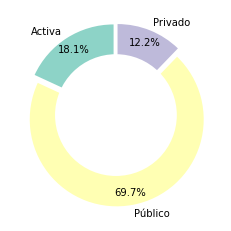

In [198]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df[df["ZipCode"].isin([8028,8901,8029,8015,8004,8001,8002,8007,8025,8023,8020,8030]) ]["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

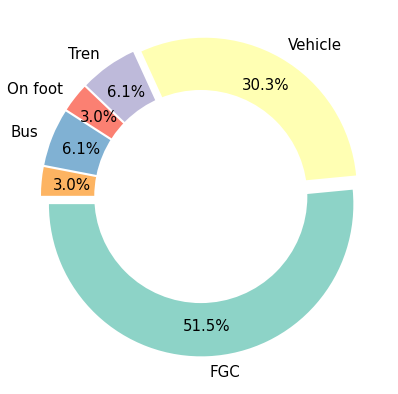

In [276]:
percentages = []
s = []
for stage in GoStagesc :
    if( sum(df_local[df_local["ZipCode"].isin([8028,8901,8029,8015,8004,8001,8002,8007,8025,8023,8020,8030]) ]["GoStagec"]==stage) != 0):
        percentages.append( sum(df_local[df_local["ZipCode"].isin([8028,8901,8029,8015,8004,8001,8002,8007,8025,8023,8020,8030]) ]["GoStagec"]==stage))
        s.append( stage )

plt.pyplot.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
plt.pyplot.pie( percentages ,  labels = s , shadow = False , autopct='%1.1f%%' , pctdistance=0.80 , startangle=180 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()



In [174]:
pd.set_option('display.max_columns', None ,'display.max_rows', None )
df_local[df_local["ZipCode"].isin([8028,8901,8029,8015,8004,8001,8002,8007,8025,8023,8020,8030])]

Unnamed: 0  Answer Gender    Center    Year  Days ZipCode SameBack  \
48            48     157  Woman  Terrassa  Fourth     1  8020.0      Yes   
156          156     391    Man  Terrassa   First     5  8025.0      Yes   
300          300     698    Man  Terrassa   Third     4  8023.0      Yes   
364          364     836  Woman  Terrassa   Third     5  8901.0      Yes   
370          370     850  Woman  Terrassa   Third     5  8028.0      Yes   
385          385     875    Man  Terrassa   First     5  8025.0      Yes   
436          436     985    Man  Terrassa   First     5  8030.0       No   
440          440     995  Woman  Terrassa   Third     5  8028.0      Yes   
498          498    1091    Man  Terrassa  Fourth     4  8007.0      Yes   
520          520    1141    Man  Terrassa   First     4  8901.0      Yes   
530          530    1160  Woman  Terrassa  Second     2  8030.0      Yes   
615          615    1309  Woman  Terrassa   First     5  8029.0      Yes   
652          652    1373    Man  Terrassa   First     5  8002.0      Yes   
694          694    1438  Woman  Terrassa   Third     5  8029.0       No   
722          722    1487    Man  Terrassa  Fourth     5  8025.0      Yes   
747          747    1558    Man  Terrassa  Second     4  8020.0      Yes   
757          757    1579    Man  Terrassa   Third     5  8029.0      Yes   
767          767    1601    Man  Terrassa  Second     4  8007.0       No   
797          797    1674  Woman  Terrassa  Fourth     3  8029.0      Yes   
861          861    1815    Man  Terrassa  Second     5  8023.0      Yes   
910          910    1893  Woman  Terrassa   First     4  8015.0       No   
993          993    2042  Woman  Terrassa   First     4  8004.0      Yes   
1007        1007    2063  Woman  Terrassa   Third     5  8001.0      Yes   
1024        1024    2091    Man  Terrassa   First     5  8030.0       No   
1041        1041    2132    Man  Terrassa   First     2  8001.0      Yes   
1104        1104    2259  Woman  Terrassa   Third     5  8030.0      Yes   
1120        1120    2287  Woman  Terrassa  Second     5  8023.0      Yes   
1145        1145    2345    Man  Terrassa   First     4  8025.0      Yes   
1147        1147    2349    Man  Terrassa  Fourth     5  8002.0      Yes   
1173        1173    2420  Woman  Terrassa  Fourth     2  8901.0      Yes   
1312        1312    2719  Woman  Terrassa  Second     5  8004.0      Yes   
1322        1322    2734  Woman  Terrassa  Fourth     5  8015.0      Yes   
1446        1446    2966  Woman  Terrassa   Third     5  8015.0      Yes   

                                             BackStage1  \
48                                                        
156                                                       
300                                                       
364                                                       
370                                                       
385                                                       
436                                             On foot   
440                                                       
498                                                       
520                                                       
530                                                       
615                                                       
652                                                       
694                                                 Bus   
722                                                       
747                                                       
757                                                       
767   Combustion vehicle (non-plug-in hybrid, electr...   
797                                                       
861                                                       
910                                             On foot   
993                                                       
1007                                                      
1024 

# Bèsos

In [277]:
df_local = df[ df["Center"].isin(["Besòs"]) ]

In [278]:
municipality_map = folium.Map([41.3947,2.1557], zoom_start=12.4, tiles='cartodbpositron')

weights_sud=pd.DataFrame({"zip_code": df_local['ZipCode'], "weight": [1]*len(df_local['ZipCode'])})
weights_sud = weights_sud.groupby('zip_code').sum()
weights_sud['weight'] = np.log(weights_sud['weight']) / np.log(weights_sud['weight'].max())
weights_sud = weights_sud.reset_index()
weights_sud = weights_sud.drop(len(weights_sud)-1)

In [279]:
m = plot_municipality_heat_map(weights_sud)
folium.Marker(location=[41.414261499999995,2.2231519345468],popup="Nord").add_to(m)
m

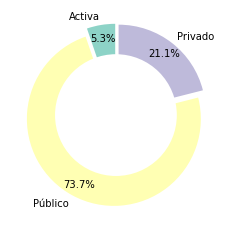

In [142]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df_local[df_local["ZipCode"].isin([8034,8014,8015,8029,8021,8004,8904]) ]["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

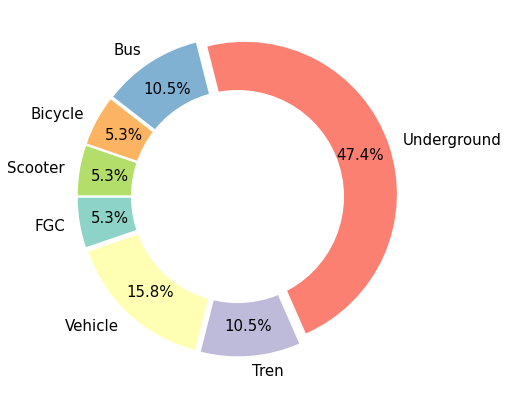

In [280]:
percentages = []
s = []
for stage in GoStagesc :
    if( sum(df_local[df_local["ZipCode"].isin([8034,8014,8015,8029,8021,8004,8904]) ]["GoStagec"]==stage) != 0):
        percentages.append( sum(df_local[df_local["ZipCode"].isin([8034,8014,8015,8029,8021,8004,8904]) ]["GoStagec"]==stage))
        s.append( stage )

plt.pyplot.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
plt.pyplot.pie( percentages ,  labels = s , shadow = False , autopct='%1.1f%%' , pctdistance=0.80 , startangle=180 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()


In [143]:
pd.set_option('display.max_columns', None ,'display.max_rows', None )
df_local[df_local["ZipCode"].isin([8025,8024,8013,8018,8005])]

Unnamed: 0  Answer Gender Center    Year  Days ZipCode SameBack  \
52            52     171    Man  Besòs   Third     5  8013.0       No   
159          159     399  Woman  Besòs   Third     4  8018.0      Yes   
683          683    1423    Man  Besòs   Third     5  8013.0      Yes   
913          913    1896    Man  Besòs  Fourth     4  8025.0      Yes   
937          937    1942    Man  Besòs   First     4  8013.0      Yes   
1042        1042    2133    Man  Besòs   First     5  8025.0      Yes   
1058        1058    2160    Man  Besòs   First     4  8013.0      Yes   
1244        1244    2588    Man  Besòs   Third     5  8018.0      Yes   
1407        1407    2900  Woman  Besòs  Fourth     2  8013.0      Yes   

       BackStage1 BackStage2 BackStage3  Fastest  Cheapest  Comfortable  \
52    Underground    On foot    On foot        1         1            0   
159                                            1         1            0   
683                                            1         0            0   
913                                            1         0            0   
937                                            0         1            0   
1042                                           0         1            0   
1058                                           1         0            1   
1244                                           1         0            1   
1407                                           1         0            1   

      OnlyOption  Environmental  Healthiest  OtherTrips Other     GoStagec  \
52             0              0           0           0               Tram   
159            0              0           0           0               Tram   
683            0              0           0           0        Underground   
913            0              0           0           1            Vehicle   
937            0              1           0           0            Bicycle   
1042           0              1           0           0        Underground   
1058           0              0           0           0               Tram   
1244           0              0           0           0        Underground   
1407           0              0           0           0               Tram   

      GoStage  
52    Público  
159   Público  
683   Público  
913   Privado  
937    Activa  
1042  Público  
1058  Público  
1244  Público  
1407  Público